### Setting up the OpenAI Gym's environment

In [ ]:
#!pip install gym
#!pip install pyglet
#!pip install pygame

## [**Cart Pole**](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)

![CartPole-v1](https://miro.medium.com/max/1188/1*LVoKXR7aX7Y8npUSsYZdKg.png "CartPole-v1")

| | |
| :-: | :-: |
| Action Space | Discrete(2) |
| Observation Shape | (4,) |
| Observation High | \[4.8 inf 0.42 inf\] |
| Observation Low | \[-4.8 -inf -0.42 -inf\] |
| Import |`gym.make("CartPole-v1")` |

**Description**
This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in [“Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”](https://ieeexplore.ieee.org/document/6313077). A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

**Action Space**

The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction of the fixed force the cart is pushed with.

| Num | Action |
| :-: | :-: |
| 0 | Push cart to the left |
| 1 | Push cart to the right |
    
**Note**: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

**Observations Space**

The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:

| Num | Observation | Min | Max |
| :-: | :-: | :-: | :-: |
| 0 | Cart Position | -4.8 | 4.8 |
| 1 | Cart Velocity | -Inf | Inf |
| 2 | Pole Angle | ~-0.418 rad (-24º) | ~0.418 rad (24º) |
| 3 | Pole Angular Velocity | -Inf | Inf |
    
**Note**: While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

- The cart x-position (index 0) can be take values between `(-4.8, 4.8)`, but the episode terminates if the cart leaves the `(-2.4, 2.4)` range.

- The pole angle can be observed between `(-.418, .418)` radians (or **±24°**), but the episode terminates if the pole angle is not in the range `(-.2095, .2095`) (or **±12°**)

**Rewards**
    
Since the goal is to keep the pole upright for as long as possible, a reward of `+1` for every step taken, including the termination step, is allotted. The threshold for rewards is 475 for v1.

**Starting State**
    
All observations are assigned a uniformly random value in `(-0.05, 0.05)`

**Episode End**
    
The episode ends if any one of the following occurs:

1. Termination: Pole Angle is greater than ±12°

2. Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)

3. Truncation: Episode length is greater than 500 (200 for v0)

### Let’s develop a Q-learning and SARSA model to solve this problem

In [ ]:
...

### Prepare OpenAI Gym Environment

In [3]:
def prepare_env():
    #Environment creation
    ...

    #Environment values
    # Observation Space: [0] cart position along x-axis / [1] cart velocity / [2] pole angle (rad) / [3] pole angular velocity
    ...

    # Action Space: [0] push cart to the left / [1] push cart to the right
    ...
    return env

In [4]:
...

Env. Observation Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Env. Observation Space - High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Env. Observation Space - Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Env. Action Space: Discrete(2)
Env. Actions Space: 2


<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

### Prepare Reinforcement Learning Model Hyper-parameters

In [5]:
#Hyperparamters
...

In [6]:
def discretised_state(state, theta_minmax, theta_dot_minmax, theta_state_size, theta_dot_state_size):
    ...

	return tuple(discrete_state.astype(np.int32))

### Q-Learning

In [7]:
def train_cart_pole_qlearning(EPISODES, DISCOUNT, EPISODE_DISPLAY, LEARNING_RATE, EPSILON):
    # Prepare OpenGym CartPole Environment
    ...
    
    #Q-Table of size theta_state_size * theta_dot_state_size * env.action_space.n
    ...
    
    # For stats
    ...
    
    #Plot Model evolution performance
    ...
    
    return ep_rewards_table

### SARSA

In [8]:
def train_cart_pole_sarsa(EPISODES, DISCOUNT, EPISODE_DISPLAY, LEARNING_RATE, EPSILON):
    # Prepare OpenGym CartPole Environment
    ...

    #Q-Table of size theta_state_size * theta_dot_state_size * env.action_space.n
    ...
    
    # For stats
    ...

    #Plot Model evolution performance
    ...
    
    return ep_rewards_table

### Results: Q-Learning vs SARSA

Env. Observation Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Env. Observation Space - High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Env. Observation Space - Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Env. Action Space: Discrete(2)
Env. Actions Space: 2
Episode:0 avg:21.0 min:21.0 max:21.0


/opt/conda/lib/python3.7/site-packages/gym/envs/classic_control/cartpole.py:212: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  "You are calling render method without specifying any render mode. "


Episode:500 avg:19.19 min:8.0 max:108.0
Episode:1000 avg:18.836 min:8.0 max:60.0
Episode:1500 avg:26.816 min:8.0 max:141.0
Episode:2000 avg:56.316 min:8.0 max:563.0
Episode:2500 avg:109.13 min:9.0 max:739.0
Episode:3000 avg:159.29 min:9.0 max:1168.0
Episode:3500 avg:228.932 min:10.0 max:1331.0
Episode:4000 avg:332.124 min:11.0 max:1823.0
Episode:4500 avg:365.758 min:12.0 max:1548.0


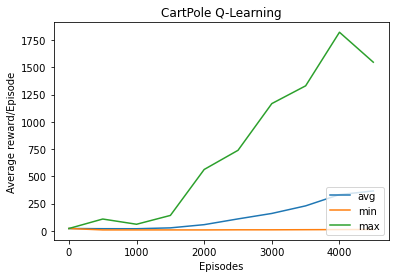

In [9]:
#Q-learning
...

Env. Observation Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Env. Observation Space - High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Env. Observation Space - Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Env. Action Space: Discrete(2)
Env. Actions Space: 2
Episode:0 avg:27.0 min:27.0 max:27.0
Episode:500 avg:18.116 min:8.0 max:78.0
Episode:1000 avg:17.202 min:8.0 max:77.0
Episode:1500 avg:19.304 min:8.0 max:94.0
Episode:2000 avg:24.608 min:8.0 max:104.0
Episode:2500 avg:33.646 min:8.0 max:221.0
Episode:3000 avg:50.208 min:8.0 max:436.0
Episode:3500 avg:88.592 min:10.0 max:756.0
Episode:4000 avg:150.384 min:9.0 max:750.0
Episode:4500 avg:199.208 min:10.0 max:930.0


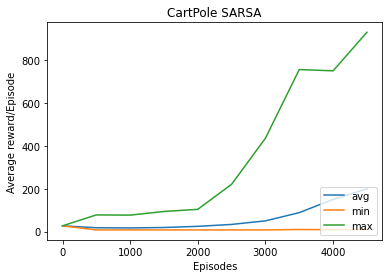

In [10]:
#SARSA
...

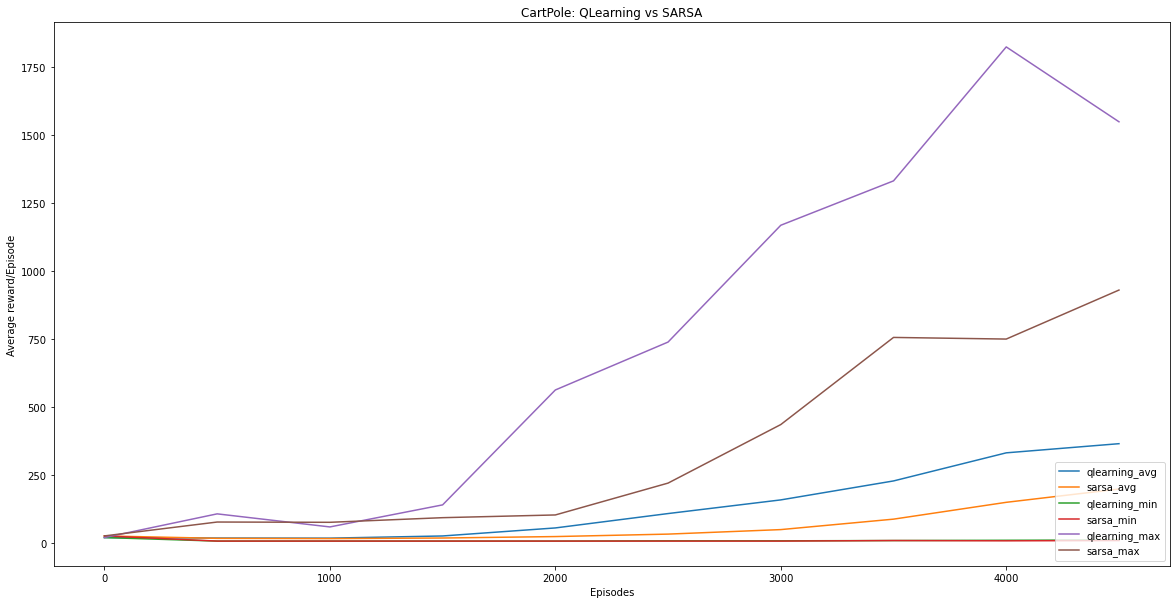

In [11]:
#Comparison
